In [13]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt


In [14]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Model

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
print(X_train.shape)

(60000, 28, 28)


In [17]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [18]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

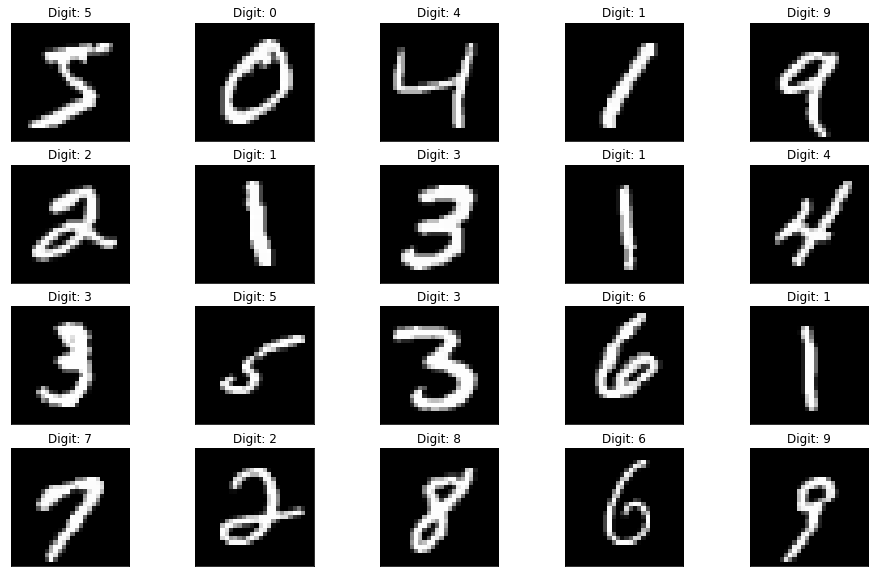

In [19]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [20]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [21]:
y_train[0:20]
#array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],dtype=uint8)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [22]:
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation="relu"),
Dense(10, activation="softmax")
])

In [23]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2381 - accuracy: 0.9281
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0778 - accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0494 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0141 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0119 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0080 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 20s 11ms

1/1 [==============================] - 0s 20ms/step


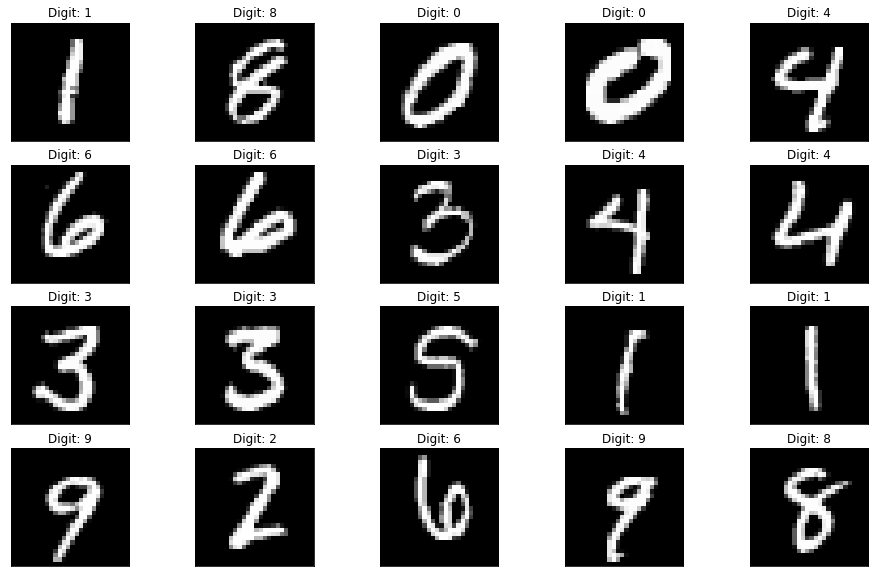

In [26]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0],axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [27]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 3ms/step


0.9859

In [28]:
score=model.evaluate(X_test,y_test,verbose=0)

In [29]:
print('Testloss:',score[0])
print('Test accuracy:', score[1])

Testloss: 0.048997025936841965
Test accuracy: 0.9858999848365784


NameError: name 'model_log' is not defined

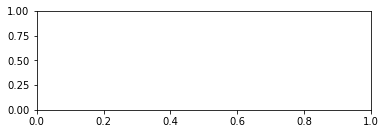

In [30]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])

In [ ]:
plt.subplot(211)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')